# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
#read data
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.shape

(294478, 5)

**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**c.** The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [6]:
df.converted.mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:

treatment_oldpage = df.query('group == "treatment" and landing_page == "old_page"')
treatment_oldpage.landing_page.count() 

1965

**f.** Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# dataframe with rows where control is not aligned with old_page
control_wrong = df.query('group == "control" and landing_page == "new_page"')
# treatment with rows where treatment is not aligned with new_page
treatment_wrong = df.query('group == "treatment" and landing_page == "old_page"')
#sum up these number of rows 
control_wrong.shape[0]+treatment_wrong.shape[0]

3893

In [10]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(control_wrong.index)
df2.drop(treatment_wrong.index, inplace = True)

In [11]:
df2.user_id.nunique()

290584

In [12]:
 df2[df2.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted


In [13]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [14]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2[df2.duplicated(subset = ["user_id"])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [16]:
df2[df2.duplicated(subset = ["user_id"])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [17]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop_duplicates(subset = "user_id",inplace = True)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2.user_id.duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [18]:
df2.converted.mean()

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
control_prob = df2[df2['group'] == "control"].converted.mean()
control_prob

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
treatment_prob = df2[df2['group'] == "treatment"].converted.mean()
treatment_prob

0.11880806551510564

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [21]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = control_prob - treatment_prob
obs_diff

0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [22]:
df2[df2['landing_page'] == 'new_page'].user_id.count()/df2.user_id.count()

0.5000619442226688

In [23]:
# What is the probability that an individual received the old page?
df2[df2['landing_page'] == 'old_page'].user_id.count()/df2.user_id.count()

0.4999380557773312

In [24]:
converted_treatment_group = df2.query("group == 'treatment' and converted == 1").count()[0]
converted_treatment_group

17264

In [25]:
converted_control_group = df2.query("group == 'control' and converted == 1").count()[0]
converted_control_group

17489

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

Looking at the data analysis results, the probabilty of receiving the new and old page, is just about even, which is a fair test for the treatment and control group. The "converted" probability (or rate) for the old page is slightly higher at 0.1204% than that of the new page at 0.1188%.The conclusion is that the new treatment group users does not lead to more conversions.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

The null hypothesis is that there is no difference in the converted rates between the new page and old page or that the old page has a better conversion rate than the new page. 

The mathematical equation for the converted rates is the new page minus the old page's will be equal to zero or less than zero.

The alternative hypothesis is that the new page leads to a better converted rate. In

The mathematical equation for the converted rates for the new page minus the old page's will be larger than zero.

The mathematical notation is:

$$H_0: p_{new} - p_{old} \leq 0$$

$$H_1: p_{new} - p_{old} > 0$$


### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

Since the under null values for the $p_{new}$ and $p_{old}$ are the same, the convert rate for both new page and old page just equal to the converted rate in ab_data.csv regardless of the page under the null hypothesis.

In [26]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [27]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [28]:
n_new = df2.query("group == 'treatment'").user_id.nunique()
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [29]:
n_old = df2.query("group == 'control'").user_id.nunique()
n_old

145274

In [30]:
n_diff= p_new - p_old
n_diff

0.0

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [31]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([1,0], size = n_new, replace = True, p = (p_new, 1-p_new))
new_page_converted.sum()

17432

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [32]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([1,0], size = n_old, replace = True, p = [p_old, (1-p_old)])
old_page_converted.sum()

17160

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [33]:
converted_sample_diff = new_page_converted.mean() - old_page_converted.mean()
converted_sample_diff

0.001842595979185735


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [34]:
# Sampling distribution 
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, replace = True, p = (p_new, 1-p_new))
    old_page_converted = np.random.choice([1,0], size = n_old, replace = True, p = (p_old, 1-p_old))
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

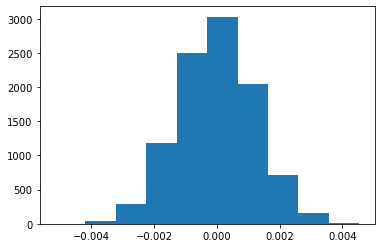

In [35]:
plt.hist(p_diffs);

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

Actual difference:  -0.0015782389853555567


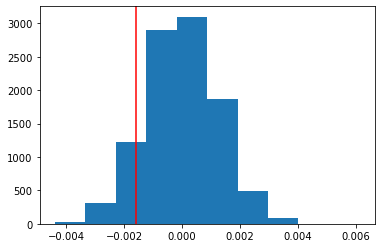

In [36]:
p_diffs = np.array(p_diffs)
#calcualte the null_vals based on the standard deviation of the p_diffs array
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals);
converted_p_old = df2.query("group == 'control'").converted.mean()
converted_p_new = df2.query("group == 'treatment'").converted.mean()
converted_diff = converted_p_new - converted_p_old
print("Actual difference: ", converted_diff)
plt.axvline(converted_diff, color = 'r')

In [37]:
p_value = (null_vals > converted_diff).mean()
p_value

0.9003

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

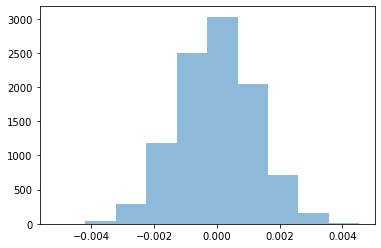

In [40]:
plt.hist(p_diffs, alpha = 0.5);

A p-value, or probability value, is a number describing how likely it is that the data being analysed would have occurred under the null hypothesis of the statistical test. P-values are calculated from the null distribution of the test statistic. They tell you how often a test statistic is expected to occur under the null hypothesis of the statistical test, based on where it falls in the null distribution.

If the test statistic is far from the mean of the null distribution, then the p-value will be small, showing that the test statistic is not likely to have occurred under the null hypothesis.

The statistical significance states that it is unlikely that observations could have occurred under the null hypothesis of a statistical test. Significance is usually denoted by a p-value, or probability value.

Statistical significance is arbitrary – it depends on the threshold, or alpha value, chosen by the researcher. The most common threshold is p < 0.05, which means that the data is likely to occur less than 5% of the time under the null hypothesis.

When the p-value falls below the chosen alpha value, then we say the result of the test is statistically significant.


** We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.**


We make the assumption that the null hypothesis is true, with both pages having the same conversion rates throughout the dataset. We also assumed that the individual conversion probability for each page is equal thoughout. We bootstrapped a sampling distribution for both pages and calculated the differences in the conversion probability per page, equal to the original number of people who received each page and a converting probability of 0.119597. 
With the resulting standard deviation of the differences, we then calculated values coming from a normal distribution around 0.Finally we calculated the proportion of values which are bigger than the actually observed difference. The calculated p-value told us the probability of receiving this observed statistic if the null hypothesis is true. With a Type-I-Error-Rate of 0.05, we can say that 0.9095 > 0.05, therefore we don't have enough evidence to reject the null hypothesis.




**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [42]:
# number of conversions with the old_page
convert_old = df2.query("group == 'control'").converted.sum()

# number of conversions with the new_page
convert_new = df2.query("group == 'treatment'").converted.sum()

# number of individuals who were shown the old_page
n_old = df2.query("landing_page == 'old_page'").count()[0]

# number of individuals who received new_page
n_new = df2.query("landing_page == 'new_page'").count()[0]

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [43]:
import statsmodels.api as sm

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

With the z-score equal to -1.31 here, the interpretation is that the observed value of 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 under the null hypothesis. The result not significant enough to reject the null hypothesis.

With a p-value equal to 0.905 here, it is 90% larger than all of the samples of 𝑝𝑛𝑒𝑤

P𝑜𝑙𝑑 provides a test statistic value close enough to the null hypothesis as is -1.31 when null hypothesis is true. So the data is consistent with the null hypothesis. Hence, we don't have evidence that the new page is better or more popular than the old one.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

Since the converted values are binary, a logistic regression should be used.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [44]:
df2['intercept'] = 1
# add dummies for landing page and put them in ab_page column
df2['ab_page'] = pd.get_dummies(df2['landing_page'])['new_page']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [45]:
# use the logistic regression model
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
# fit the model
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 01 Nov 2021   Pseudo R-squ.:               8.077e-06
Time:                        23:23:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


We can see that the p-value associated with ab page is 0.1899 and it is high compared to the alpha value 0.05, so we fail to reject the null hypothesis with insignificant evidence that the old and new page impacts the linear relationship with the converted choice.

The p-value in the Part II, helps us determine if there is a significant difference in converted rates between the new page and old page. The null hypothesis is that there is no difference in converted rates between the new page and old page or that the old page is better for more converted rates than the new page. 
The alternative hypothesis is that the new page leads to more converted rate.

For Part II is a one-sided test, as we calculate the probability of receiving an observed statistic if the null hypothesis is true. However, the ab_page p-value is the result of a two sided test, because the null hypothesis for this case is, that there is no significant relationship between the conversion rate and ab_page. The value of the predictor is related to changes in the response variable".


**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Other features to consider could be extracts of the time stamp, for example the day of the week or the gender/income infrastructure (if this data would be available). This could lead to more precise results and a higher accuracy. The disadvantages are the increasing complexity of interpretation and the possible introduction of multicollinearity. However, the last problem can be solved with calculating the VIF's. 

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [ ]:
# Read the countries.csv
df_countries = pd.read_csv("countries.csv")
df_countries.head()

In [ ]:
# Join with the df2 dataframe
df_log_country = df_log.merge(df_countries, on="user_id", how = "left")

In [ ]:
# Create the necessary dummy variables
country = pd.get_dummies(df2['country'])
df2 = df2.join(country)
df2.head()

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [ ]:
# Fit your model, and summarize the results
log_mod2 = sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK']])
results2 = log_mod2.fit()
results2.summary()

## Conclusions

In the second A/B Test, we observed that the p-value associated with the ab_page is 0.1899. The ab_page p-value is the result of a two sided test, because the null hypothesis for this case is, that there is no significant relationship between the conversion rate and ab_page. Therefore we do not have evidence to reject the null hypothesis. It concludes that there is no evidence that the new page brings a higher conversion rate for new users.

We then performed a z-test to infer a difference between the old/new page converted rate, and we got the same result.

The linear regression test results showed the old oage to new page have no significant linear relationship with the converted choice. 

After adding the country variable to see if country had an impact on conversion, the result showed that the country of users are not associated with changes in the conversion decision.

Lastly we added the interaction term between page and country variable, and the result showed the interaction between page and country have no significant effects on conversion.


<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

## References:

* Statistics using Technogies - https://s3-us-west-2.amazonaws.com/oerfiles/statsusingtech2.pdf
* https://www.scribbr.com/statistics/p-value/
* https://www.jigsawacademy.com/blogs/data-science/logistic-regression/
* https://www.geeksforgeeks.org/understanding-logistic-regression/
* https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing
* https://math.ucdenver.edu/~ssantori/MATH2830SP13/Math2830-Chapter-08.pdf
* https://milnepublishing.geneseo.edu/natural-resources-biometrics/chapter/chapter-7-correlation-and-simple-linear-regression/
*https://blog.minitab.com/en/adventures-in-statistics-2/how-to-identify-the-most-important-predictor-variables-in-regression-models
* https://www.jigsawacademy.com/blogs/ai-ml/bootstrap-sampling/